In [308]:
# 1

import pandas as pd
kw = pd.read_csv('keywords.csv')
kw.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [309]:
geo_data = {
 
    'Центр': ['москва', 'тула', 'ярославль','одноклассники'],
 
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
 
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
 
}

In [310]:
geo_data

{'Центр': ['москва', 'тула', 'ярославль', 'одноклассники'],
 'Северо-Запад': ['петербург', 'псков', 'мурманск'],
 'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']}

In [311]:
geo_data.get('Центр')

['москва', 'тула', 'ярославль', 'одноклассники']

In [312]:
def get_Value(value,dic):
    for name in dic:
        if value in dic[name] :
            del dic[name]
            return name
        else :
            return 'undefined'

        

In [313]:
kw['region'] = kw['keyword'].apply(get_Value, args = (geo_data,))
#kw.apply(lambda x: get_Value(geo_data,x['keyword']), axis=1) #

In [314]:
#kw['keyword'].apply(lambda x: get_Value(geo_data,x))
kw.head()
#kw['keyword']

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,Центр
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [315]:
#2 
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [316]:
def rating_class(x):
    x = float(x)
    if x <= 2.:
        return 'низкий рейтинг'
    if x <= 4.:
        return 'средний рейтинг'
    if x >= 4.5:
        return 'Высокий рейтинг'
    else :
        return 'undefined'

In [317]:
ratings['class'] = ratings['rating'].apply(rating_class)

In [318]:
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,средний рейтинг
1,1,1029,3.0,1260759179,средний рейтинг
2,1,1061,3.0,1260759182,средний рейтинг
3,1,1129,2.0,1260759185,низкий рейтинг
4,1,1172,4.0,1260759205,средний рейтинг


In [319]:
#3 
from datetime import datetime
rating_group = ratings.groupby(['userId'])['timestamp'].agg(['count','min','max']).query('count>100').sort_values(['count'],ascending=False)

In [320]:
rating_group['diff'] =rating_group['max'].apply(lambda x:  datetime.fromtimestamp(x)) - rating_group['min'].apply(lambda x:  datetime.fromtimestamp(x))

In [321]:
rating_group.head()


,count,min,max,diff
userId,,,,
547,2391,974777109,1476587644,5807 days 23:48:55
564,1868,974708446,976224804,17 days 13:12:38
624,1735,1019123866,1476616373,5295 days 01:15:07
15,1700,997937239,1469330735,5455 days 22:38:16
73,1610,1255500852,1476086345,2553 days 01:44:53


In [322]:
#4

import re, datetime

movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [323]:
movies_merge = ratings.merge(movies, how = 'left', on = 'movieId')

In [324]:
def find_year(date):
    match = re.search('\d{4}', date)
    if match :
        year = datetime.datetime.strptime(match.group(), '%Y').date().year
        if (year > 1901) and (year < 2018):
            return year
    else:
        return 1900
    

In [325]:
# type(find_year ('                     Toy Story (1995)'))
movies_merge['production_year'] = movies_merge['title'].apply(lambda x: find_year(x) )
#year = match.group(0) if match else '2013'

In [326]:
movies_merge.head()

,userId,movieId,rating,timestamp,class,title,genres,production_year
0,1,31,2.5,1260759144,средний рейтинг,Dangerous Minds (1995),Drama,1995.0
1,1,1029,3.0,1260759179,средний рейтинг,Dumbo (1941),Animation|Children|Drama|Musical,1941.0
2,1,1061,3.0,1260759182,средний рейтинг,Sleepers (1996),Thriller,1996.0
3,1,1129,2.0,1260759185,низкий рейтинг,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,1981.0
4,1,1172,4.0,1260759205,средний рейтинг,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,1989.0


In [327]:
movies_mean = movies_merge.groupby('production_year')['rating'].agg(['mean']).sort_values(['production_year'],ascending=False)

In [328]:
import matplotlib.pyplot as plt

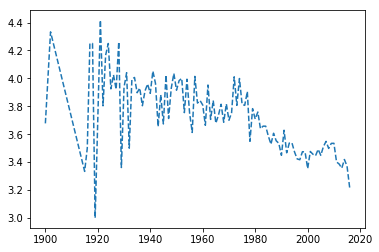

In [329]:
plt.plot(movies_mean['mean'],  linestyle='dashed')